# Lab 6 - Logistic Regression

The goal is to classify the species of an Iris flower given the dimensions of parts of the flower. The classification is binary, there are two classes: virginica and non-virginica.

Dataset used: [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [131]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

#### Explore Dataset  

**Load Dataset**

In [113]:
# Load the Diabetes dataset
iris = load_iris(as_frame=True)

# Extract feature data (data) and target variable
X = iris.data
y = iris.target

# Convert the data and target to a DataFrame
df = pd.concat([X, y], axis=1)
df.columns = list(iris.feature_names) + ['target']

# Redefine target variable: 0 and 1 as '0', 2 as '1'
df['target'] = df['target'].map({0: 0, 1: 0, 2: 1})
y_new = df.target

# Get unique target values
unique_targets = df['target'].unique()

print("Unique target values:", unique_targets)
print(df.head())

Unique target values: [0 1]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**Summary of the dataset used**

This shows the summary of the data used in 2 categories as non-virginica and virginica using the 4 features sepal length, sepal width, petal length and petal width.

In [114]:
descriptive_stats = df.groupby('target').describe().transpose()

print(descriptive_stats)

target                            0          1
sepal length (cm) count  100.000000  50.000000
                  mean     5.471000   6.588000
                  std      0.641698   0.635880
                  min      4.300000   4.900000
                  25%      5.000000   6.225000
                  50%      5.400000   6.500000
                  75%      5.900000   6.900000
                  max      7.000000   7.900000
sepal width (cm)  count  100.000000  50.000000
                  mean     3.099000   2.974000
                  std      0.478739   0.322497
                  min      2.000000   2.200000
                  25%      2.800000   2.800000
                  50%      3.050000   3.000000
                  75%      3.400000   3.175000
                  max      4.400000   3.800000
petal length (cm) count  100.000000  50.000000
                  mean     2.861000   5.552000
                  std      1.449549   0.551895
                  min      1.000000   4.500000
             

**Histograms of Features by Class**  

This shows the distribution of each class across two classes (Non-virginica and Virginica). 

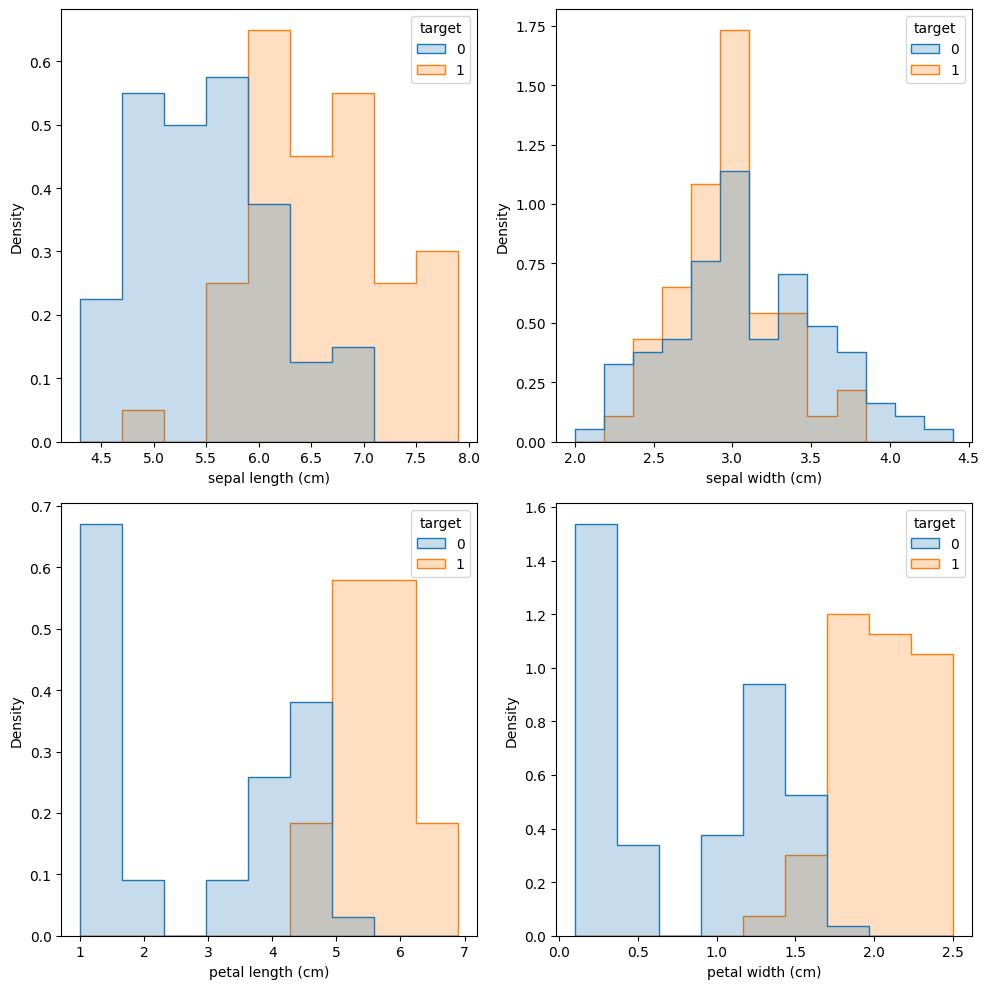

In [115]:
# Create a figure and axis
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot a histogram for each feature
features = iris['feature_names']
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data=df, x=features[i], hue="target", element="step", stat="density", common_norm=False, ax=ax)


plt.tight_layout()
plt.show()

**Correlation Matrix of Features**  

This heatmap shows the correlation matrix between features, the color intensity provide insights into the strength and direction of the correlations giving understanding the interdependencies among features.

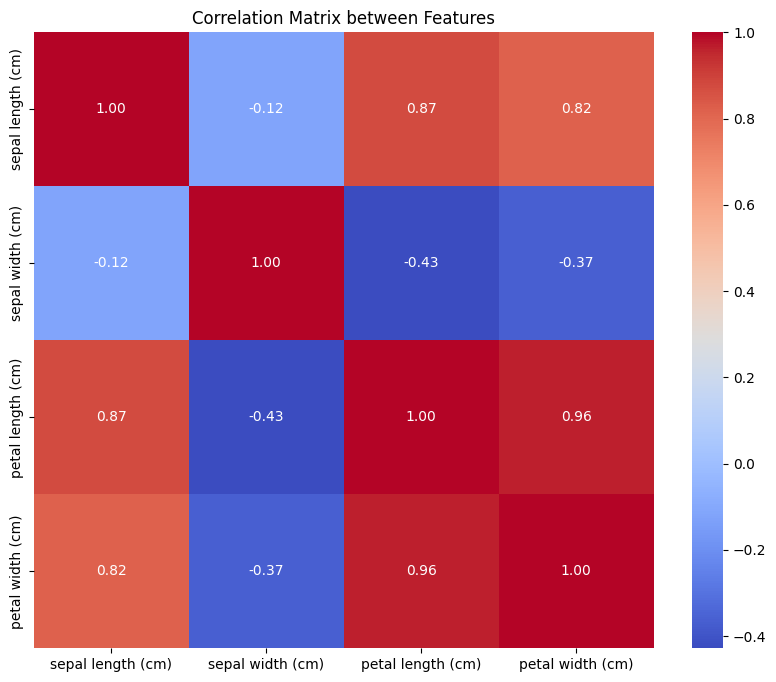

In [116]:
correlation_matrix = df.iloc[:, :-1].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Features')
plt.show()

**Additional Exploratory Data Analysis Graphs**  

* Violin Plot of Feature Distribution by Class   
    Source: [Kaggle - Violin Plot](https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris)

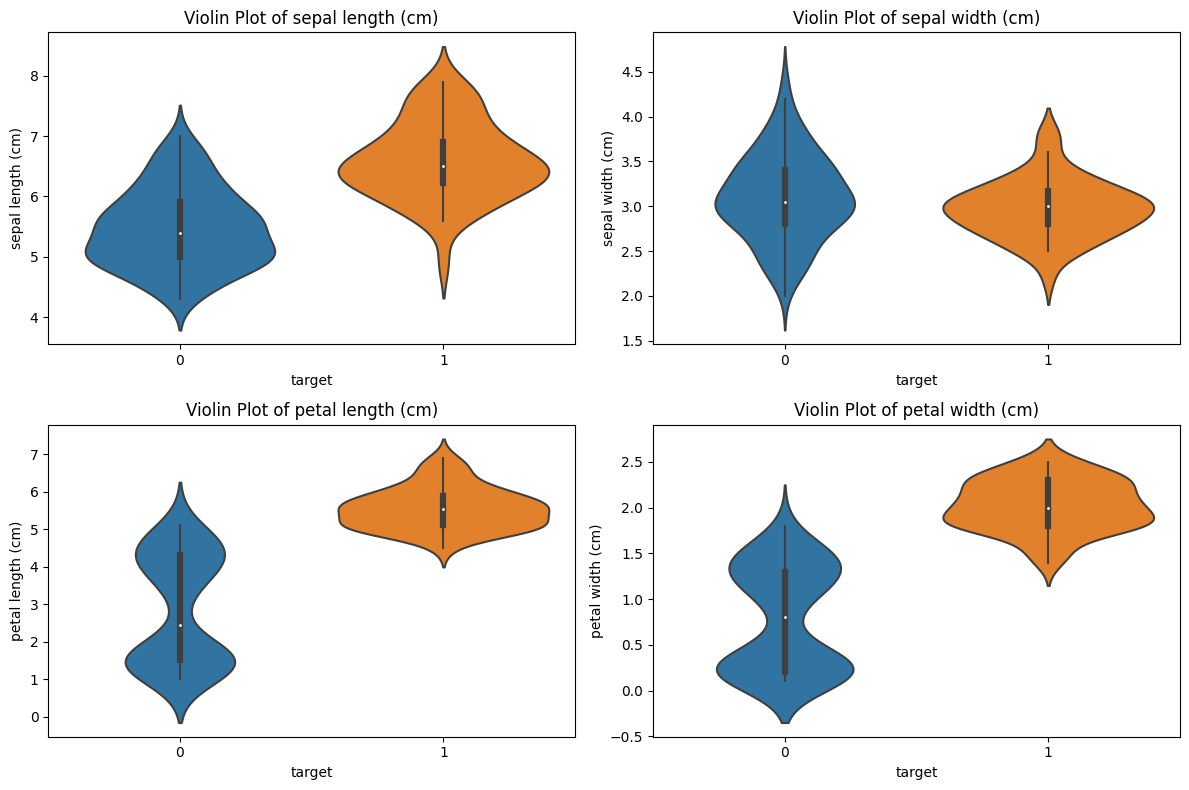

In [117]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target', y=feature, data=df)
    plt.title('Violin Plot of ' + feature)
plt.tight_layout()
plt.show()

* Boxplot with Individual Points Overlay  
    Source: [Kaggle - Box plot](https://www.kaggle.com/code/benhamner/python-data-visualizations)

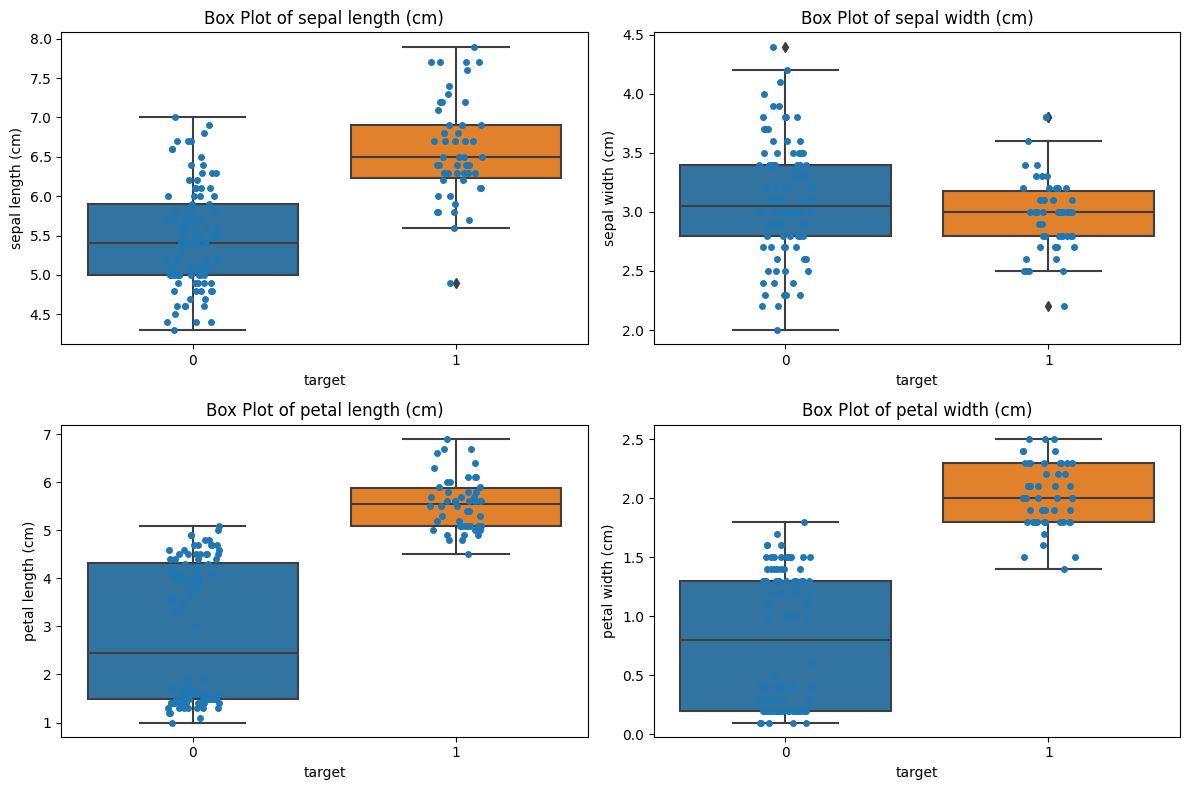

In [118]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    ax = sns.boxplot(x="target", y=feature, data=df)
    ax = sns.stripplot(x="target", y=feature, data=df, jitter=True, edgecolor="gray")
    plt.title('Box Plot of ' + feature)
plt.tight_layout()
plt.show()

* Pair plot of feature vs class  
    Source: [Kaggle - Pair Plot](https://www.kaggle.com/code/benhamner/python-data-visualizations)

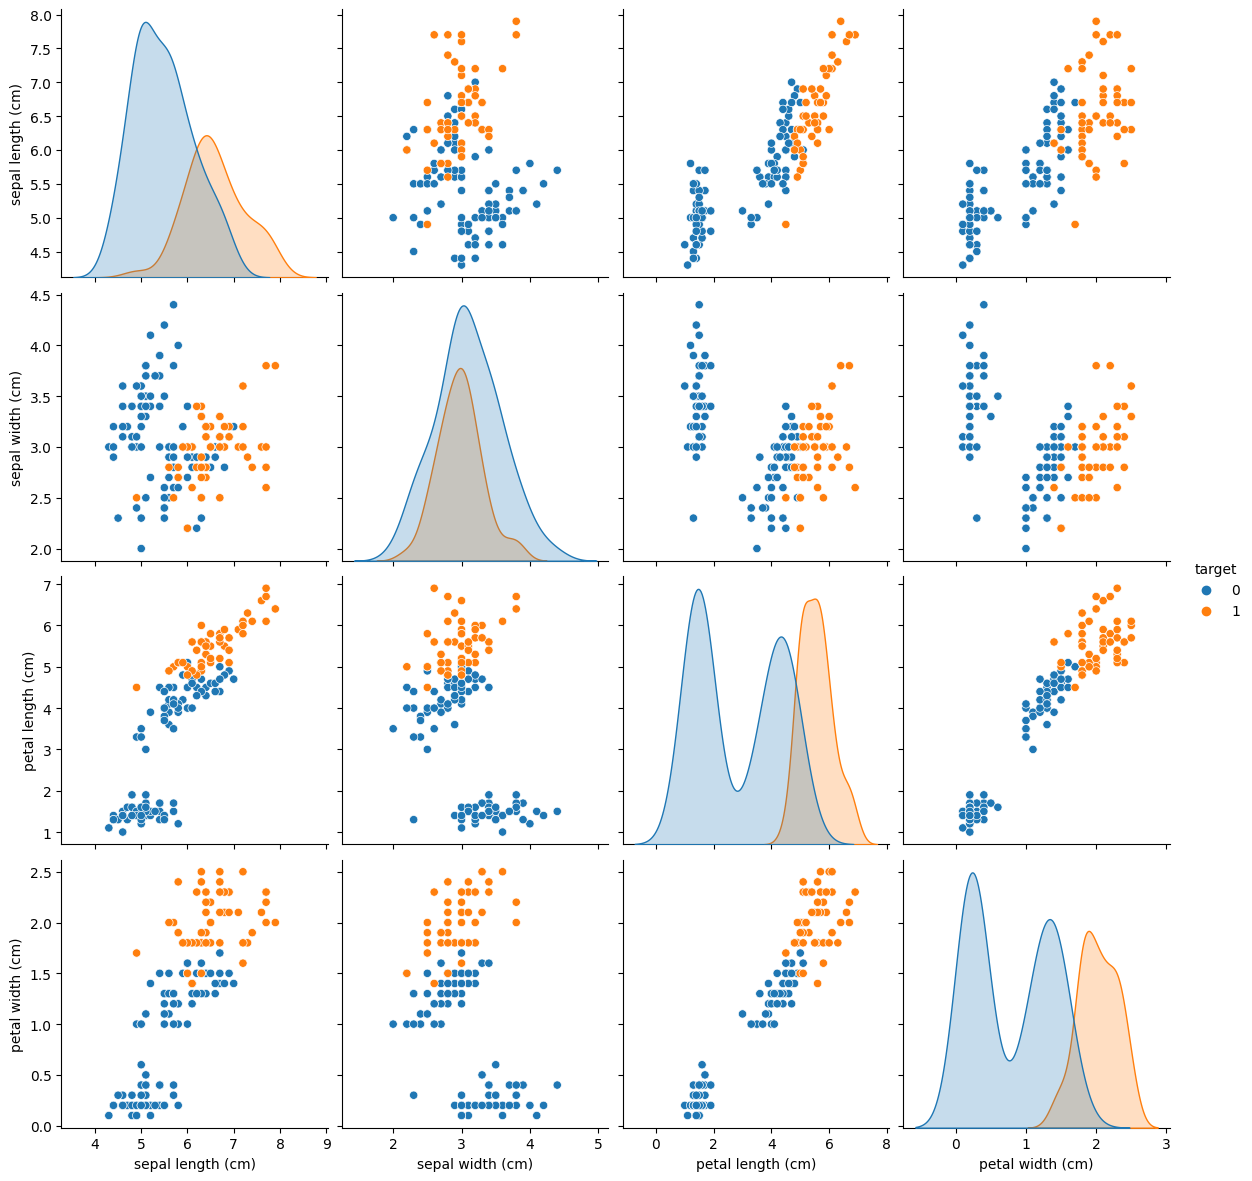

In [119]:
sns.pairplot(df, hue='target', height=3, diag_kind="kde")
plt.show()

**Splitting the data**

The data is split to a train set (120 records), a validation set (15 records)  and a test set (15 records)

In [120]:
# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y_new, test_size=30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=15, random_state=42)

**Build logistic regression models**  

Here four logistic regression models is created with 1,2,3 and 4 features randomly.

In [121]:

# Randomly select features

models = {}
selected_features_lists = []

# Iterate over different numbers of features
for num_features in range(1, 5):
    # Randomly select num_features
    selected_features = np.random.choice(features, num_features, replace=False)
    selected_features_lists.append(list(selected_features))
    
    print(f'Features for Model {num_features} :{selected_features}')
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train[selected_features], y_train)
    
    # Make predictions
    y_pred = model.predict(X_test[selected_features])
    # Store model
    models[f"model_{num_features}"] = model

# Access models using keys model_1, model_2, model_3, model_4
model_1 = models["model_1"]
model_2 = models["model_2"]
model_3 = models["model_3"]
model_4 = models["model_4"]

Features for Model 1 :['petal width (cm)']
Features for Model 2 :['petal length (cm)' 'sepal length (cm)']
Features for Model 3 :['sepal width (cm)' 'petal width (cm)' 'petal length (cm)']
Features for Model 4 :['petal width (cm)' 'sepal length (cm)' 'sepal width (cm)'
 'petal length (cm)']


**Evaluate the models on the validation set**

In [122]:
i = 0 
# Iterate over each model and generate tables and summary measures
for model_name, model in models.items():
    # Generate predictions and probabilities for the validation set
    y_pred = model.predict(X_val[selected_features_lists[i]])
    y_proba = model.predict_proba(X_val[selected_features_lists[i]])[:, 1]  # Probability of predicting 'virginica'

    i = i+1

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Instance Number': range(1, len(y_val) + 1),
        'Probability of Predicting Virginica': y_proba,
        'Predicted Label': y_pred,
        'Ground Truth': y_val
    })

   # Set maximum column width to 30 characters
    pd.set_option('display.max_colwidth', 30)

    # Display the table
    print(f"\nTable for Model: {model_name}\n")
    print(results_df.to_string(index=False))

    # Summary for each model
    print(f"Summary Measures for Model: {model_name}")
    print(f'Accuracy: {accuracy_score(y_val, y_pred)}')


Table for Model: model_1

 Instance Number  Probability of Predicting Virginica  Predicted Label  Ground Truth
               1                             0.007232                0             0
               2                             0.004901                0             0
               3                             0.925283                1             1
               4                             0.925283                1             1
               5                             0.350797                0             0
               6                             0.636206                1             1
               7                             0.636206                1             1
               8                             0.198051                0             0
               9                             0.003318                0             0
              10                             0.003318                0             0
              11                      

**Decision boundary for Model 1**

Decision Boundary for Model 1: [[1.65722887]]


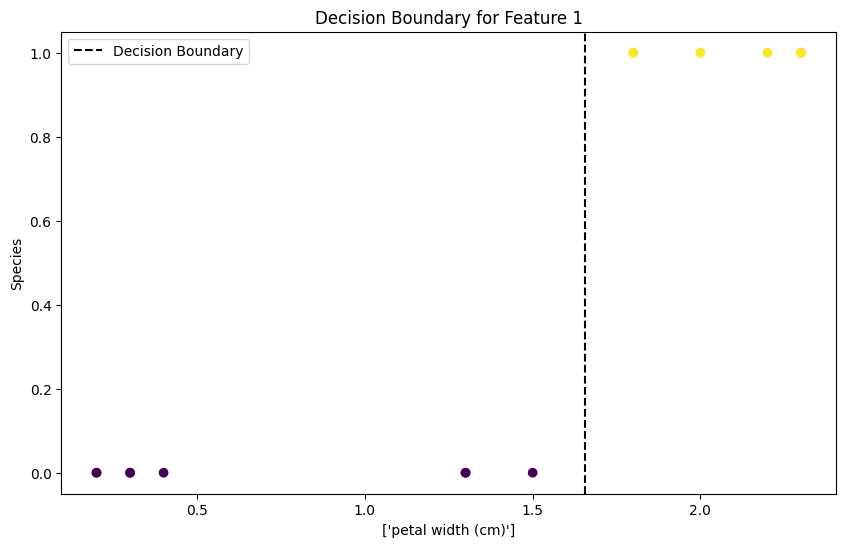

In [125]:
# Calculate decision boundary for model_1
decision_boundary_f1 = -models['model_1'].intercept_ / models['model_1'].coef_
 
print(f'Decision Boundary for Model 1: {decision_boundary_f1}')
# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.scatter(X_val[selected_features_lists[0]], y_val, c=y_val, cmap='viridis')
plt.axvline(decision_boundary_f1, color='black', linestyle='--', label='Decision Boundary')
plt.title('Decision Boundary for Feature 1')
plt.xlabel(selected_features_lists[0])
plt.ylabel('Species')
plt.legend()
plt.show()

**Decision boundary for Model 2**

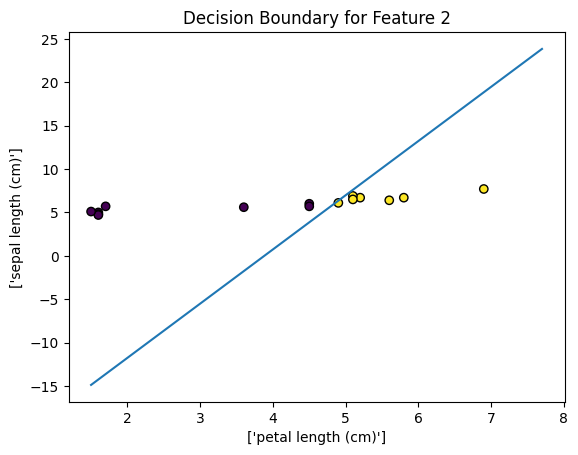

In [126]:
feature_2_min = min(X_val[selected_features_lists[1][0]].min(), X_val[selected_features_lists[1][1]].min())
feature_2_max = max(X_val[selected_features_lists[1][0]].max(), X_val[selected_features_lists[1][1]].max())
 
# plot the data
plt.scatter(X_val[selected_features_lists[1][0]], X_val[selected_features_lists[1][1]], c=y_val, cmap='viridis', edgecolors='k')
 
# plot decison boundary
decision_boundary_f2_x1 = np.linspace(feature_2_min,feature_2_max, 10)
decision_boundary_f2_x2 = -models['model_2'].intercept_ / models['model_2'].coef_[0][1] - models['model_2'].coef_[0][0] / models['model_2'].coef_[0][1] * decision_boundary_f2_x1
plt.plot(decision_boundary_f2_x1, decision_boundary_f2_x2)
plt.title('Decision Boundary for Feature 2')
plt.xlabel([selected_features_lists[1][0]])
plt.ylabel([selected_features_lists[1][1]])
plt.show()

**Decision boundary for Model 3**

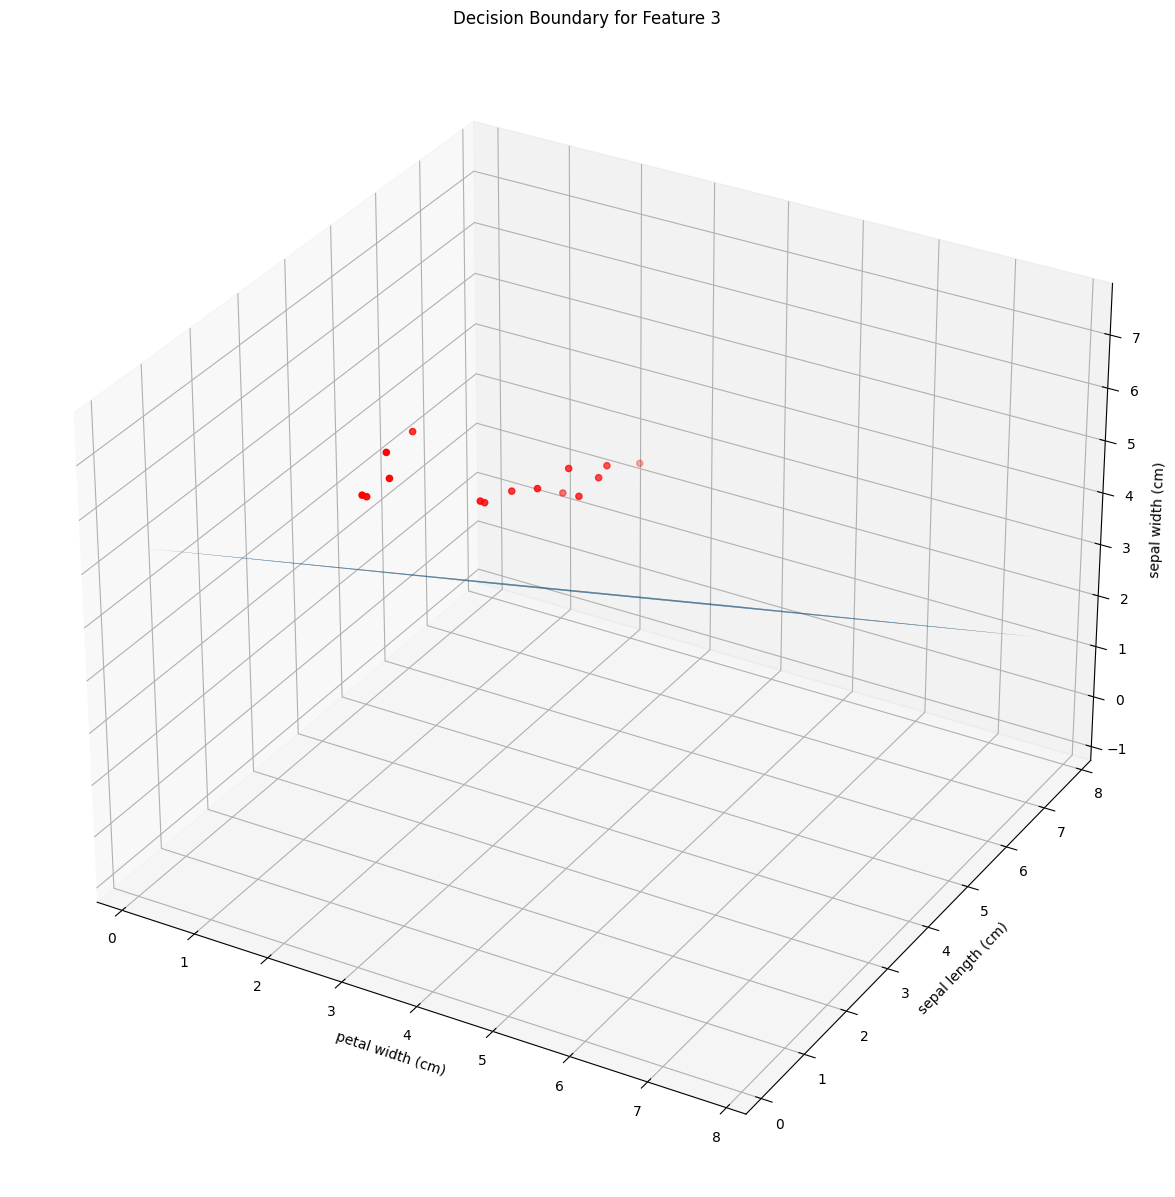

In [132]:
 
feature_3_min = min(X_val[selected_features_lists[3][0]].min(), X_val[selected_features_lists[3][1]].min(),X_val[selected_features_lists[3][2]].min())
feature_3_max = max(X_val[selected_features_lists[3][0]].max(), X_val[selected_features_lists[3][1]].max(),X_val[selected_features_lists[3][2]].max())
 
x1, x2 = np.meshgrid(np.linspace(feature_3_min,feature_3_max, 10), np.linspace(feature_3_min,feature_3_max, 10))
decision_boundary_f3_x3 = -(models['model_3'].intercept_ / models['model_3'].coef_[0][2]) - models['model_3'].coef_[0][0] / models['model_3'].coef_[0][2] * x1 - models['model_3'].coef_[0][1] / models['model_3'].coef_[0][2] * x2
 
 
fig = plt.figure(figsize=(20,15))

# Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_val[selected_features_lists[3][0]], X_val[selected_features_lists[3][1]], X_val[selected_features_lists[3][2]], color='r')
 

ax.plot_surface(x1, x2, decision_boundary_f3_x3)
plt.title('Decision Boundary for Feature 3')
ax.set_xlabel(selected_features_lists[0][0])
ax.set_ylabel(selected_features_lists[1][1])
ax.set_zlabel(selected_features_lists[3][2])
plt.show()

**Evaluating the model on test**

In [130]:
i = 0 
# Iterate over each model and generate tables and summary measures
for model_name, model in models.items():
    # Generate predictions and probabilities for the validation set
    y_pred_test = model.predict(X_test[selected_features_lists[i]])
    y_proba_test = model.predict_proba(X_test[selected_features_lists[i]])[:, 1]  # Probability of predicting 'virginica'

    i = i+1

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Instance Number': range(1, len(y_val) + 1),
        'Probability of Predicting Virginica': y_proba_test,
        'Predicted Label': y_pred_test,
        'Ground Truth': y_test
    })

   # Set maximum column width to 30 characters
    pd.set_option('display.max_colwidth', 30)

    # Display the table
    print(f"\nTable for Model: {model_name}\n")
    print(results_df.to_string(index=False))

    # Summary for each model
    print(f"Summary Measures for Model: {model_name}")
    print(f'Accuracy: {accuracy_score(y_test, y_pred_test)}')


Table for Model: model_1

 Instance Number  Probability of Predicting Virginica  Predicted Label  Ground Truth
               1                             0.925283                1             1
               2                             0.444222                0             0
               3                             0.849848                1             1
               4                             0.101424                0             0
               5                             0.350797                0             0
               6                             0.143072                0             0
               7                             0.004901                0             0
               8                             0.792805                1             1
               9                             0.003318                0             0
              10                             0.143072                0             0
              11                      

From the above test and validation result, we observe that all the models have the same accuracy as 1. 